Прочитайте csv файл (використовуйте функцію read_csv)

In [2]:
import pandas as pd
bestsellers = pd.read_csv('bestsellers with categories.csv')
bestsellers

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Виведіть перші п'ять рядків (використовується функція head)

In [3]:
bestsellers.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Виведіть розміри датасету (використовуйте атрибут shape)

In [4]:
bestsellers.shape

(550, 7)

Відповідь: Про скільки книг зберігає дані датасет?

In [9]:
print(f"number of books: {bestsellers.count().iloc[0]}")

number of books: 550


In [11]:
bestsellers.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

**Первинне дослідження даних**

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
Відповідь: Чи є в якихось змінних пропуски? - **НІ**

In [12]:
bestsellers.isnull().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
Відповідь: Які є унікальні жанри? - **Non Fiction, Fiction**


In [15]:
unique_genres = bestsellers['genre'].unique()
unique_genres

array(['Non Fiction', 'Fiction'], dtype=object)

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')


<Axes: ylabel='Frequency'>

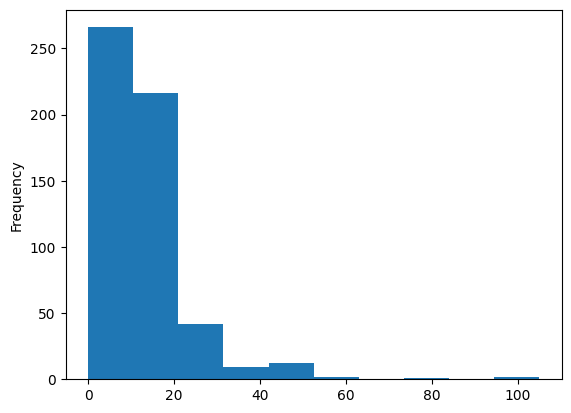

In [17]:
bestsellers['price'].plot.hist()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
Відповідь: Максимальна ціна?
Відповідь: Мінімальна ціна?
Відповідь: Середня ціна?
Відповідь: Медіанна ціна?


In [21]:
f"Максимальна ціна?: {bestsellers['price'].max()}"

'Максимальна ціна?: 105'

In [22]:
f"Мінімальна ціна?: {bestsellers['price'].min()}"

'Мінімальна ціна?: 0'

In [23]:
f"Середня ціна?: {bestsellers['price'].mean()}"

'Середня ціна?: 13.1'

In [24]:
f"Медіанна ціна?: {bestsellers['price'].median()}"

'Медіанна ціна?: 11.0'

**Пошук та сортування даних**

Відповідь: Який рейтинг у датасеті найвищий? Відповідь:

In [26]:
max_rating = bestsellers['user_rating'].max()
print(f"Найвищий рейтинг у датасеті: {max_rating}")

Найвищий рейтинг у датасеті: 4.9


Відповідь: Скільки книг мають такий рейтинг? Відповідь:

In [29]:
count_max_rating = bestsellers[bestsellers['user_rating'] == max_rating].shape[0]

print(f"Кількість книг з найвищим рейтингом: {count_max_rating}")

Кількість книг з найвищим рейтингом: 52


Відповідь: Яка книга має найбільше відгуків? Відповідь:

In [32]:
most_reviewed_book = bestsellers.sort_values('reviews', ascending=False).iloc[0]

print(f"Книга з найбільшою кількістю відгуків: {most_reviewed_book['name']}")

Книга з найбільшою кількістю відгуків: Where the Crawdads Sing


Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:

In [33]:
top_50_2015 = bestsellers[(bestsellers['user_rating'] > 0) & (bestsellers['year'] == 2015)]

most_expensive_book = top_50_2015.sort_values('price', ascending=False).iloc[0]

print(f"Найдорожча книга з Топ-50 у 2015 році: {most_expensive_book['name']}")

Найдорожча книга з Топ-50 у 2015 році: Publication Manual of the American Psychological Association, 6th Edition


Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:

In [35]:
fiction_2010 = bestsellers[(bestsellers['genre'] == 'Fiction') & (bestsellers['user_rating'] > 0) & (bestsellers['year'] == 2010)]

count_fiction_2010 = fiction_2010.shape[0]

print(f"Кількість книг жанру Fiction, що потрапили до Топ-50 у 2010 році: {count_fiction_2010}")

Кількість книг жанру Fiction, що потрапили до Топ-50 у 2010 році: 20


Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:

In [36]:
books_2010_2011 = bestsellers[(bestsellers['user_rating'] == 4.9) & (bestsellers['year'].isin([2010, 2011]))]

count_books_2010_2011 = books_2010_2011.shape[0]

print(f"Кількість книг з рейтингом 4.9, що потрапили до рейтингу у 2010 та 2011 роках: {count_books_2010_2011}")

Кількість книг з рейтингом 4.9, що потрапили до рейтингу у 2010 та 2011 роках: 1


І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
Відповідь: Яка книга остання у відсортованому списку? Відповідь:

In [37]:
books_2015_cheap = bestsellers[(bestsellers['year'] == 2015) & (bestsellers['price'] < 8)]

sorted_books_2015_cheap = books_2015_cheap.sort_values('price', ascending=True)

last_book_in_sorted_list = sorted_books_2015_cheap.iloc[-1]

print(f"Остання книга у відсортованому списку: {last_book_in_sorted_list['name']}")

Остання книга у відсортованому списку: Old School (Diary of a Wimpy Kid #10)


**Агрегування даних та з'єднання таблиць**

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам                                          Відповідь: Максимальна ціна для жанру Fiction: Відповідь
Відповідь: Мінімальна ціна для жанру Fiction: Відповідь
Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь
Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь

In [39]:
price_ranges = bestsellers.groupby('genre')['price'].agg(['min', 'max'])

print(price_ranges)

             min  max
genre                
Fiction        0   82
Non Fiction    0  105


Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні
Відповідь: Якої розмірності вийшла таблиця? Відповідь:
Відповідь: Який автор має найбільше книг? Відповідь:
Відповідь: Скільки книг цього автора? Відповідь:

In [40]:
book_counts = bestsellers.groupby('author')['name'].count().reset_index()

print(f"Розмірності таблиці: {book_counts.shape}")

most_books_author = book_counts.loc[book_counts['name'].idxmax(), 'author']

most_books_count = book_counts.loc[book_counts['name'].idxmax(), 'name']

print(f"Автор з найбільшою кількістю книг: {most_books_author}")
print(f"Кількість книг цього автора: {most_books_count}")

Розмірності таблиці: (248, 2)
Автор з найбільшою кількістю книг: Jeff Kinney
Кількість книг цього автора: 12


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
Відповідь: Який автор перший у списку?

In [45]:
book_counts = bestsellers.groupby('author')['name'].count().reset_index()

average_ratings = bestsellers.groupby('author')['user_rating'].mean().reset_index()

merged_bestsellers = pd.concat([book_counts, average_ratings], axis=1)

sorted_df = merged_bestsellers.sort_values(by=['name', 'user_rating'], ascending=[True, True])

first_author = sorted_df.iloc[0]['author']

print(f"Перший автор у списку: {first_author}")

Перший автор у списку: author    Muriel Barbery
author    Muriel Barbery
Name: 171, dtype: object
